In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import utils
pd.set_option('display.max_rows', 6)
%config InlineBackend.figure_format='retina'

In [ ]:
# load runs
experiments = {}
experiments['b2'] = utils.load_sweeps(['fig10_fixed_b2_v3'])
experiments['t2'] = utils.load_sweeps(['fig10_fixed_t2_v3'])

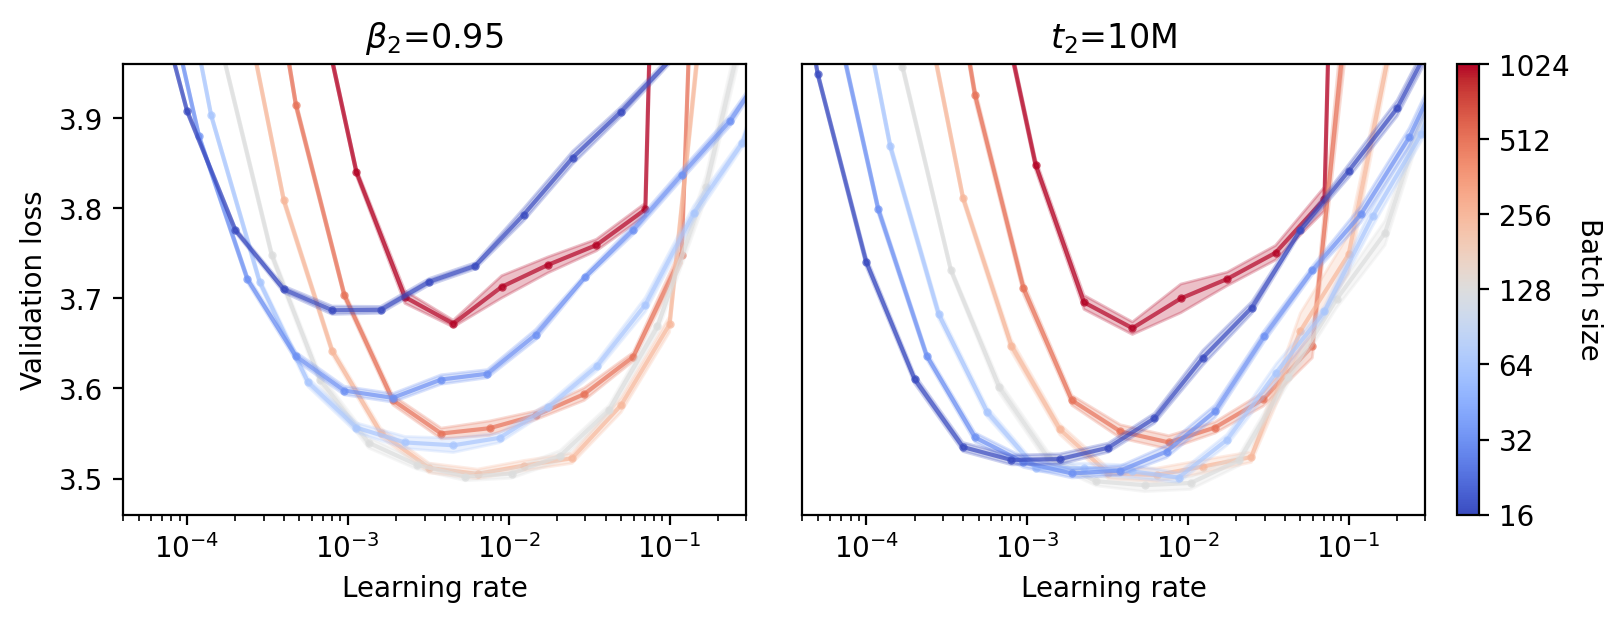

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), layout='constrained')

# generate plot colors
df = experiments['b2']
batch_sizes = np.sort(df['opt.batch_size'].unique())
color_mapper = mpl.cm.ScalarMappable(cmap='coolwarm')
colors = color_mapper.to_rgba(np.log(batch_sizes))

for i, exp in enumerate(('b2', 't2')):
    df = experiments[exp]
    
    for j, bs in enumerate(batch_sizes):
        bs_runs = df.loc[df['opt.batch_size'] == bs]
        x = bs_runs['opt.peak_lr'].values
        y = bs_runs['eval_loss'].values
        # o = np.argsort(x)
        # axs[i].plot(x[o], y[o], '.-', c=colors[j], label=bs, mec='white', mew=0.5, ms=8)

        x_unique = np.sort(np.unique(x))
        y = [y[x==u] for u in x_unique] # [-1, n_seeds]
        se = np.array([np.std(v)/np.sqrt(len(v)) for v in y])
        y_mean = np.array([np.mean(v) for v in y])
        y_min, y_max = y_mean-se, y_mean+se
        axs[i].plot(x_unique, y_mean, '.-', c=colors[j], label=bs, zorder=-bs, alpha=0.7, ms=4)
        axs[i].fill_between(x_unique, y_min, y_max, color=colors[j], alpha=0.25, zorder=-bs)
        
    axs[i].set_xscale('log')
    axs[i].set_xlim([4e-5, 3e-1])
    axs[i].set_ylim([3.46, 3.96])
    axs[i].set_xlabel('Learning rate')

# colorbar
cbar = fig.colorbar(color_mapper, ax=axs[-1], location='right', format=lambda x, _: f'{np.exp(x):g}')
cbar.set_ticks(np.log(batch_sizes))
cbar.ax.set_ylabel('Batch size', rotation=-90, labelpad=12)
# axs[1].legend(loc='upper right')

axs[0].set_ylabel('Validation loss')
axs[1].set_ylabel(' ')
axs[1].set_yticks([])
axs[0].set_title(r'${\beta_2}$=0.95')
axs[1].set_title(r'${t_2}$=10M')
# plt.savefig('plots/google_fig10_2x.pdf')
plt.show()